In [54]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
from scipy import stats
from statistics import mean
from numpy.polynomial.polynomial import polyfit

In [22]:
n1=np.array([17.5,22,29.5,44.5,64.5,80])
n2=np.array([38,36,24,20,18,28])

In [23]:
n=np.column_stack((n1,n2))

In [24]:
l=len(n1)
#initialize the list with all zeros
p=[0]*(l+1)  

In [26]:
lower_val=[]
upper_val=[]
for i in range(l):
    print("i=",i)
    if(i==0):
        upper=int((n1[0]+n1[1])/2)
        lower=n1[0]-(upper-n1[0])
    else:
        lower=upper+1
        upper=n1[i]+(n1[i]-lower)
    lower_val.append(lower)
    upper_val.append(upper)
    print("lower =",lower," upper= ",upper)

i= 0
lower = 16.0  upper=  19
i= 1
lower = 20  upper=  24.0
i= 2
lower = 25.0  upper=  34.0
i= 3
lower = 35.0  upper=  54.0
i= 4
lower = 55.0  upper=  74.0
i= 5
lower = 75.0  upper=  85.0


Text(0, 0.5, ' No. of Deaths')

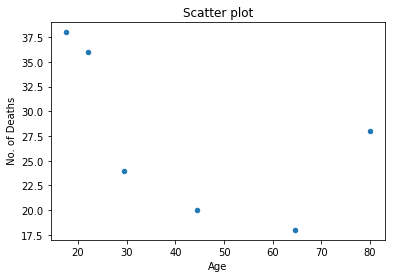

In [27]:
plt.scatter(n1,n2,s=20)
plt.title('Scatter plot')
plt.xlabel('Age')
plt.ylabel(' No. of Deaths')


In [28]:
df = pd.DataFrame(n, columns = ['Age', 'Deaths']) 

In [29]:
n1_s = n1**2
n2_s = n2**2
n1n2 = n1*n2

In [44]:
df['lower']=lower_val
df['upper']=upper_val

df['Age_Square']=n1_s
df['Death_Square']=n2_s
df['xCrossY']=n1n2


In [45]:
df=df[['Age','lower','upper','Deaths','Age_Square','Death_Square','xCrossY']]
df

,Age,lower,upper,Deaths,Age_Square,Death_Square,xCrossY
0,17.5,16.0,19.0,38.0,306.25,1444,665.0
1,22.0,20.0,24.0,36.0,484.00,1296,792.0
2,29.5,25.0,34.0,24.0,870.25,576,708.0
3,44.5,35.0,54.0,20.0,1980.25,400,890.0
4,64.5,55.0,74.0,18.0,4160.25,324,1161.0
5,80.0,75.0,85.0,28.0,6400.00,784,2240.0


In [57]:
#y = a + bx

In [46]:
s_age=sum(df['Age'])
s_deaths=sum(df['Deaths'])
s_age_sq=sum(df['Age_Square'])
s_death_sq=sum(df['Death_Square'])
s_xy=sum(df['xCrossY'])

In [47]:
b=( s_xy - (s_age*s_deaths)/l ) / (s_age_sq  - (s_age*s_age)/l)
a= ( s_deaths - (b*s_age) )/l

In [49]:
print("b=",b)
print("a=",a)

b1= -0.19182491149018346
b0= 35.58180452741122


In [50]:
#for age 40
y = a + b*40
print(y)

27.908808067803882


In [51]:
#for age 60
y = a + b*60
print(y)

24.072309838000216


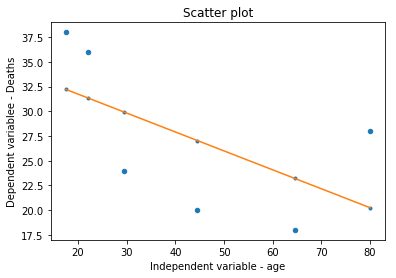

In [52]:
plt.scatter(n1,n2,s=20)
plt.title('Scatter plot')
plt.xlabel('Independent variable - age')
plt.ylabel('Dependent variablee - Deaths')
x = n1
y = b1 * x + b0

# Fit with polyfit
b, m = polyfit(x, y, 1)

plt.plot(x, y, '.')
plt.plot(x, b + m * x, '-')
plt.show()

In [77]:
# For entire dataset, there is a negative corelation between the Age and the No. of Deaths. 
#However, for the age group 80, there seems to be a positive relation i.e. the number of deaths increases with the age.

In [55]:
#Correlation coefficient
scipy.stats.pearsonr(n1,n2)

(-0.578743707566063, 0.22880788559284734)